K-Mean Clustering: Unsupervised Machine Learning Algorithm

Steps:
1. Initialize K
2. Points which are nearest to the centroids are grouped together
3. Move the centroid by calculating the mean
4. Repeat step 2 and 3 to segregrate groups
------------------------------------------------
How to select K-value:

Calculate WCSS: 

Within clusters sum of squares--> sum\(distance from each point to the centroid)^2
Distance is calculated using Euclidean Distance

Elbow METHOD: WE need to find the value of K after which WCSS value is stablized

RANDOM INITIALIZATION TRAP:--> ENSURES Centroids are initialized far away from the the data points to avoid Random initialization (Technique is known as K-MEANS ++)



In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [5]:
X.shape

(1000, 2)

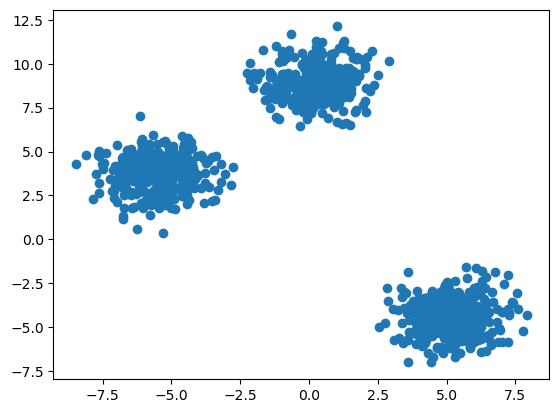

In [9]:
plt.scatter(X[:,0],X[:,1])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.cluster import KMeans

In [12]:
#Manual Method
#Elbow method to select the K value

In [16]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

In [17]:
wcss

[36285.58841267135,
 8328.553214543635,
 1377.5862843080133,
 1192.6048934695496,
 1033.0021609802043,
 888.1318134360256,
 787.1658704603292,
 691.409823383373,
 603.4121539743735,
 558.4354330405804]

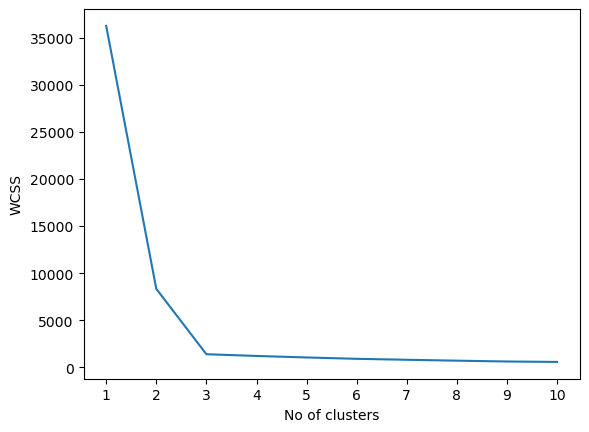

In [18]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('No of clusters')
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [20]:
y_labels=kmeans.fit_predict(X_train)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


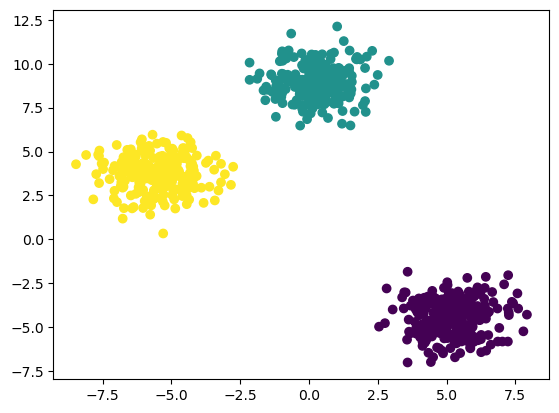

In [21]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [23]:
y_test=kmeans.predict(X_test)

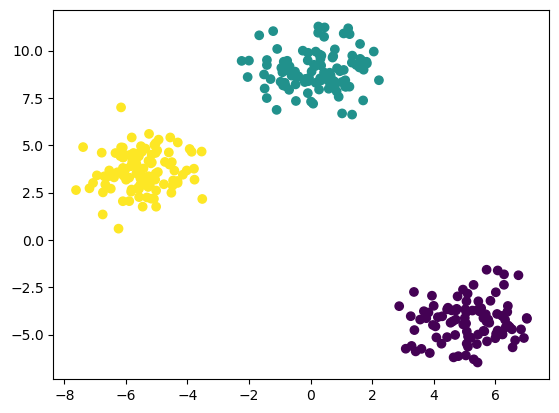

In [24]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

In [25]:
#Knee Locator ---Automated method to determine number of K
!pip install kneed

In [29]:
from kneed import KneeLocator

In [30]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [32]:
kl.elbow

3